# Dia 6: Avalia√ß√£o de sistema de recomenda√ß√£o com Teste A/B e Teste de Hip√≥teses

Neste notebook, vamos validar se um sistema de recomenda√ß√£o melhora a taxa de convers√£o em um e-commerce, utilizando [A/B Testing Dataset](https://www.kaggle.com/datasets/zhangluyuan/ab-testing/data). Os dados utilizados cont√©m informa√ß√µes sobre usu√°rios expostos a diferentes vers√µes do site e suas convers√µes ao longo do tempo.

### Objetivos
- Comparar duas vers√µes do site com Teste A/B.
- Aplicar Testes de Hip√≥tese para verificar se a diferen√ßa √© significativa.
- Analisar os dados e interpretar os resultados estat√≠sticos.

### Sum√°rio
- Carregar os dados do experimento A/B
- Criar uma amostra representativa
- Analisar estat√≠sticas e visualizar os dados
- Executar o Teste A/B comparando as vers√µes do site
- Aplicar um Teste de Hip√≥tese para validar os resultados

No final, determinaremos se a nova vers√£o do site deve ser implementada.

## Importa√ß√µes

### 0.1 Bibliotecas e m√≥dulos

In [31]:
import kagglehub
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 0.2 Carregamento do Dataset

In [32]:
# Download do Dataset
path = kagglehub.dataset_download("zhangluyuan/ab-testing")
print("Path to dataset files:", path)

Path to dataset files: /Users/liviagrigolon/.cache/kagglehub/datasets/zhangluyuan/ab-testing/versions/1


In [33]:
path_csv = path + "/ab_data.csv"
df_testes = pd.read_csv(path_csv)

# Verificar se carregou corretamente
df_testes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [34]:
df_testes.head()  # Visualizar as primeiras linhas

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [35]:
df_testes.info()  # Verificar tipos de dados e valores nulos
df_testes.describe()  # Estat√≠sticas gerais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id      converted
count  294478.000000  294478.000000
mean   787974.124733       0.119659
std     91210.823776       0.324563
min    630000.000000       0.000000
25%    709032.250000       0.000000
50%    787933.500000       0.000000
75%    866911.750000       0.000000
max    945999.000000       1.000000

## 1 Criar amostragem

In [36]:
df_amostra = df_testes.sample(n=5000, random_state=42)  # Amostra fixa para reprodutibilidade

## 2 Analisar estat√≠sticas e visualizar dados

/var/folders/tb/3rkysv496vs8fxvth4bytgs40000gn/T/ipykernel_78283/2926960058.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary.index, y=df_summary["conversion_rate"], palette=colors)


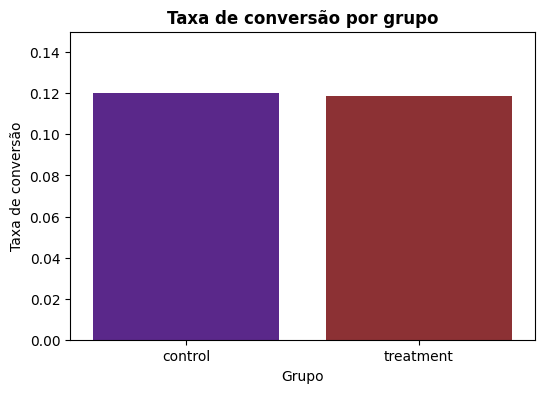

In [37]:
# Criar um DataFrame com os dados resumidos
df_summary = df_testes.groupby("group")["converted"].agg(["mean", "count", "sum"])
df_summary["conversion_rate"] = df_summary["sum"] / df_summary["count"]

# Definir paleta de cores
colors = ["#5A189A", "#9B2226"]

# Gr√°fico de Barras - Taxa de convers√£o por grupo
plt.figure(figsize=(6, 4))
sns.barplot(x=df_summary.index, y=df_summary["conversion_rate"], palette=colors)
plt.xlabel("Grupo")
plt.ylabel("Taxa de convers√£o")
plt.title("Taxa de convers√£o por grupo", fontweight="bold")
plt.ylim(0, 0.15)  # Ajuste baseado nos valores observados
plt.show()

Sem diferen√ßas vis√≠veis. As barras das convers√µes s√£o praticamente iguais entre os grupos "control" e "treatment", indicando que o novo sistema de recomenda√ß√£o n√£o teve um impacto relevante.

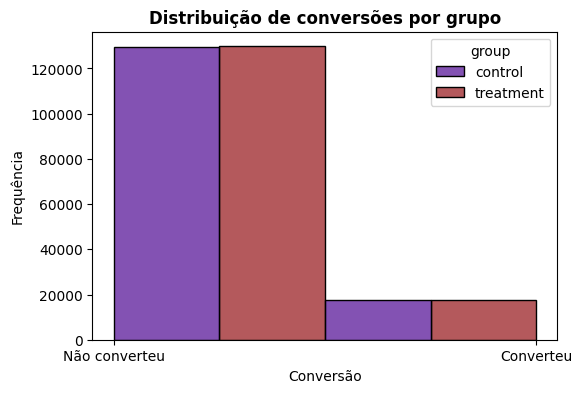

In [38]:
# Gr√°fico de distribui√ß√£o - Histograma das convers√µes
plt.figure(figsize=(6, 4))
sns.histplot(df_testes, x="converted", hue="group", multiple="dodge", bins=2, palette=colors)
plt.xlabel("Convers√£o")
plt.ylabel("Frequ√™ncia")
plt.title("Distribui√ß√£o de convers√µes por grupo", fontweight="bold")
plt.xticks([0, 1], ["N√£o converteu", "Converteu"])
plt.show()

O histograma mostra que a quantidade de usu√°rios que n√£o converteram (barra √† esquerda) √© muito maior do que os que converteram (barra √† direita) em ambos os grupos.

/var/folders/tb/3rkysv496vs8fxvth4bytgs40000gn/T/ipykernel_78283/2499731675.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="group", y="converted", data=df_testes, ci=95, palette=colors)
/var/folders/tb/3rkysv496vs8fxvth4bytgs40000gn/T/ipykernel_78283/2499731675.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="group", y="converted", data=df_testes, ci=95, palette=colors)


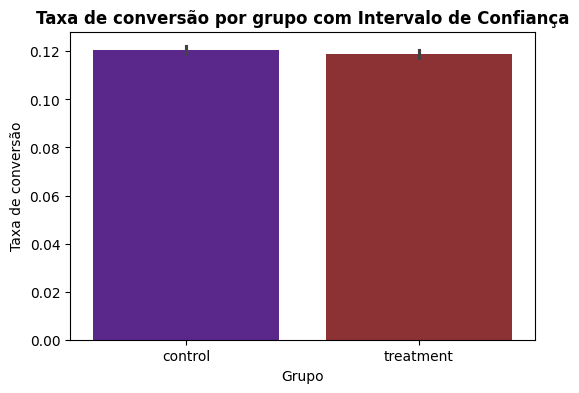

In [39]:
# Converter 'timestamp' para datetime e criar coluna de dia para an√°lise temporal
df_testes["timestamp"] = pd.to_datetime(df_testes["timestamp"])
df_testes["date"] = df_testes["timestamp"].dt.date

# Gr√°fico de Barras com Intervalo de Confian√ßa
plt.figure(figsize=(6, 4))
sns.barplot(x="group", y="converted", data=df_testes, ci=95, palette=colors)
plt.xlabel("Grupo")
plt.ylabel("Taxa de convers√£o")
plt.title("Taxa de convers√£o por grupo com Intervalo de Confian√ßa", fontweight="bold")
plt.show()

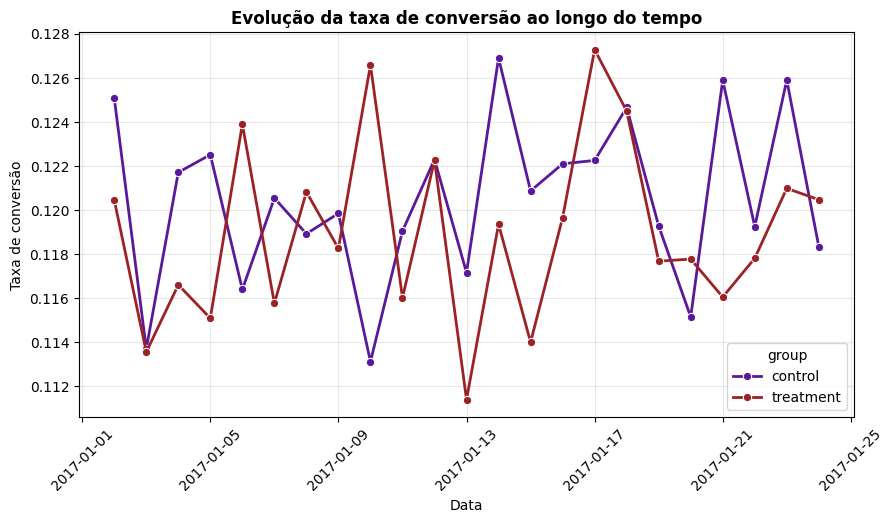

In [40]:
# Linha de Tempo da Convers√£o
df_time_series = df_testes.groupby(["date", "group"])["converted"].mean().reset_index()

plt.figure(figsize=(10, 5))  # Aumentei a largura para melhor leitura
sns.lineplot(
    data=df_time_series, 
    x="date", 
    y="converted", 
    hue="group", 
    palette=colors, 
    marker="o", 
    markersize=6, 
    linewidth=2
)

plt.xlabel("Data")
plt.ylabel("Taxa de convers√£o")
plt.title("Evolu√ß√£o da taxa de convers√£o ao longo do tempo", fontsize=12, fontweight="bold")

plt.xticks(rotation=45)  # Gira os r√≥tulos do eixo X para evitar sobreposi√ß√£o
plt.grid(alpha=0.3)  # Adiciona uma grade leve no fundo para melhorar a leitura

plt.show()

Sem um padr√£o claramente vis√≠vel
- Ambas as linhas (controle e tratamento) apresentam flutua√ß√µes ao longo do tempo, mas n√£o h√° um comportamento consistente onde um grupo esteja sempre acima do outro. Isso sugere que a diferen√ßa entre as vers√µes pode n√£o ser significativa.

Oscila√ß√µes similares
- Os dois grupos apresentam momentos de alta e baixa na taxa de convers√£o de forma parecida. Se houvesse uma vantagem clara do grupo treatment, esperar√≠amos que sua linha estivesse consistentemente acima da linha do controle.

Picos e quedas podem ser ru√≠do
- Alguns dias mostram varia√ß√µes mais bruscas, mas isso pode ser apenas uma varia√ß√£o natural dos dados (aleatoriedade) e n√£o um efeito real causado pela mudan√ßa no site.

## 3 Teste A/B

In [41]:
taxa_conversao = df_testes.groupby("group")["converted"].mean()
print(taxa_conversao)

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64


### 3.1 Interpreta√ß√£o do Teste A/B:
- Control (vers√£o antiga do site): 12,04%
- Treatment (nova vers√£o com recomenda√ß√£o): 11,89%

Ou seja, a diferen√ßa √© pequena, mas para determinar se essa diferen√ßa √© estatisticamente significativa, voc√™ precisar√° aplicar um Teste de Hip√≥tese.

## 4 Teste de Hip√≥tese

In [42]:
# Criar tabelas de contagem para cada vers√£o do site
contingencia = pd.crosstab(df_testes['group'], df_testes['converted'])

# Teste Qui-Quadrado
chi2, p_valor, _, _ = stats.chi2_contingency(contingencia)

print(f"Estat√≠stica do teste: {chi2}")
print(f"P-Valor: {p_valor}")

Estat√≠stica do teste: 1.5159618356336582
P-Valor: 0.21823161216311676


### 4.1 Interpreta√ß√£o do Teste de Hip√≥tese
- Estat√≠stica do teste: 1.52
- P-valor: 0.2182
O p-valor de 0.2182 √© maior do que o n√≠vel de signific√¢ncia comum (Œ± = 0.05), o que significa que n√£o h√° evid√™ncias estat√≠sticas suficientes para rejeitar a hip√≥tese nula (H‚ÇÄ). 

Logo, n√£o podemos afirmar que a nova vers√£o do site (com sistema de recomenda√ß√£o) tem uma taxa de convers√£o significativamente diferente da vers√£o antiga.


## Conclus√£o
O teste A/B realizado comparou as taxas de convers√£o entre a vers√£o antiga e a nova do site, que inclui o sistema de recomenda√ß√£o. Os resultados n√£o indicam uma diferen√ßa estatisticamente significativa nas taxas de convers√£o entre os dois grupos.

üîú Pr√≥ximos passos: 
- Realizar um novo teste com um tamanho de amostra maior para aumentar o poder estat√≠stico.
- Testar varia√ß√µes do sistema de recomenda√ß√£o para avaliar se outras abordagens podem impactar a convers√£o.
- Explorar outras m√©tricas al√©m da convers√£o, como tempo m√©dio na p√°gina e valor m√©dio das compras, para uma an√°lise mais completa do impacto.


- Talvez seja necess√°rio um novo teste com mais usu√°rios (aumentar o tamanho da amostra).
- Avaliar outras m√©tricas al√©m da convers√£o (exemplo: tempo no site, ticket m√©dio).